In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

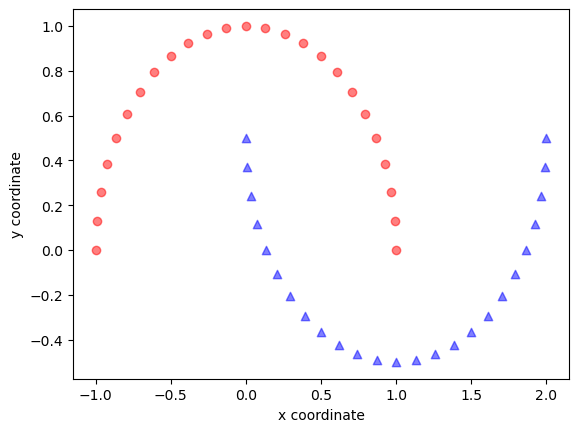

In [2]:
X, y = make_moons(n_samples=50, random_state=1)

plt.scatter(X[y==0, 0], X[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], 
            color='blue', marker='^', alpha=0.5)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

In [3]:
def centralized_rbf_kernel_matrix(gamma, data):

    n = data.shape[0]
    pairwise_sq_dists = np.sum(data ** 2, axis=1, keepdims=True)
    kernel = pairwise_sq_dists - 2 * np.dot(data, data.T) + pairwise_sq_dists.T
    kernel *= -gamma
    kernel = np.exp(kernel)
    
    # Centering the kernel matrix
    H = np.ones((n, n)) / n
    K_centered = kernel - H.dot(kernel) - kernel.dot(H) + H.dot(kernel).dot(H)
    
    return K_centered

rbf_kernel = centralized_rbf_kernel_matrix(15, X)

In [5]:
eigen_values, eigen_vectors = np.linalg.eigh(rbf_kernel)

idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

X_proj = np.dot(rbf_kernel, eigen_vectors[:, :2])

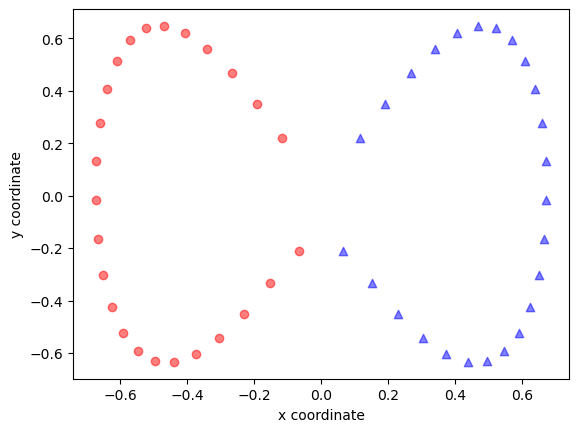

In [6]:
plt.scatter(X_proj[y==0, 0], X_proj[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_proj[y==1, 0], X_proj[y==1, 1], 
            color='blue', marker='^', alpha=0.5)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

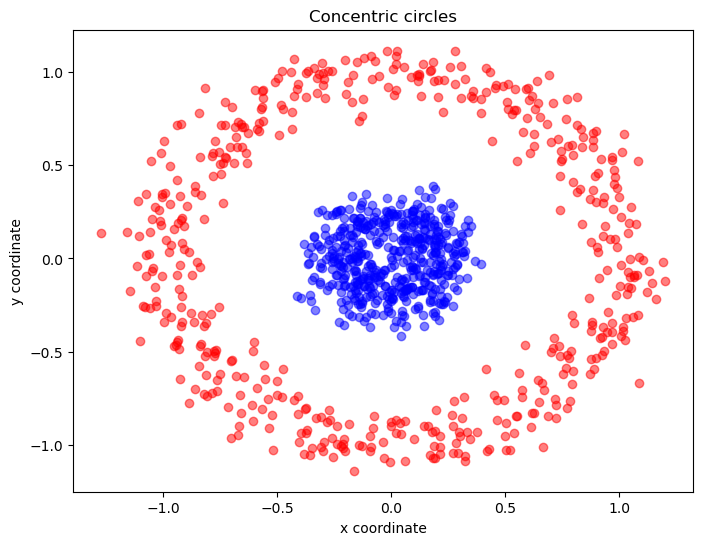

In [7]:
## now for the moon dataset
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, 
                    noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()


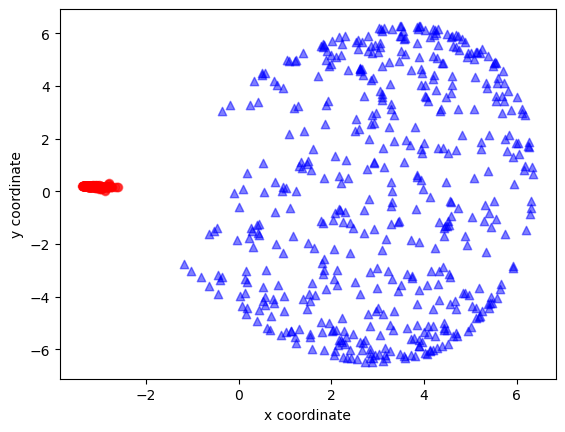

In [9]:
## kernel pca on above data

rbf_kernel = centralized_rbf_kernel_matrix(15, X)

eigen_values, eigen_vectors = np.linalg.eigh(rbf_kernel)

idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

X_proj = np.dot(rbf_kernel, eigen_vectors[:, :2])

plt.scatter(X_proj[y==0, 0], X_proj[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_proj[y==1, 0], X_proj[y==1, 1], 
            color='blue', marker='^', alpha=0.5)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

0.0006761945890436696
[[-0.99751977 -0.43440447]
 [-0.87723212  0.48101233]
 [ 0.0149411  -0.89511973]
 ...
 [ 1.00718043  0.22128856]
 [ 0.81622887  0.59709298]
 [-0.1152876   0.01757594]]


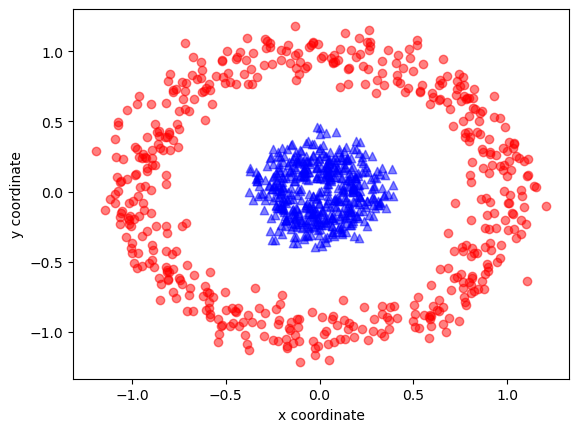

In [10]:
## now normal pca on above data

mean = np.mean(X)
print(mean)
std_X = X - mean

cov_matrix = np.matmul(std_X.T, std_X)/len(std_X)
# print(cov_matrix)

eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

X_proj = np.dot(std_X, eigen_vectors)


X_proj_shift = X_proj + mean
print(X_proj_shift)

plt.scatter(X_proj_shift[y==0, 0], X_proj_shift[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_proj_shift[y==1, 0], X_proj_shift[y==1, 1], 
            color='blue', marker='^', alpha=0.5)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()
